# Python graphics:  Matplotlib fundamentals

We illustrate three approaches to graphing data with Python's Matplotlib package:    

* Approach #1:  Apply a `plot()` method to a dataframe
* Approach #2:  Use the `plot(x,y)` function 
* Approach #3:  Create a figure object and apply methods to it

The last one is the least intuitive but also the most useful.  We work up to it gradually.  This [book chapter](https://davebackus.gitbooks.io/test/content/graphs1.html) covers the same material with more words and fewer pictures.  

This IPython notebook was created by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Reminders

* **Packages**:  collections of tools that we access with `import` statements
* **Pandas**:  Python's data package 
* **Objects** and **methods**:  we apply the method `justdoit` to the object `x` with `x.justdoit`
* **Dataframe**:  a spreadsheet-like data structure 
* **Series**:  a single variable 
* **Jupyter**:  an environment for combining code with text and graphics 


## Preliminaries 

### Jupyter 

Look around, what do you see?  Check out the **menubar** at the top:  File, Edit, etc.  Also the **toolbar** below it.  Click on Help -> User Interface Tour for a tour of the landscape.  

The **cells** below come in two forms.  Those labeled Code (see the menu in the toolbar) are Python code.  Those labeled Markdown are text.  

### Markdown

Markdown is a user-friendly language for text formatting.  You can see how it works by clicking on any of the Markdown cells and looking at the raw text that underlies it. In addition to just plain text, we'll use three things a lot:

* Bold and italics.  The raw text `**bold**` displays as **bold**.  The raw text `*italics*` displays as *italics*.  
* Bullet lists.  If we want a list of items marked by bullets, we start with a blank line and mark each item with an asterisk on a new line.  Double click on this cell for an example.   
* Headings.  We create section headings by putting a hash in front of the text.  `# Heading` gives us a large heading.  Two hashes a smaller heading, three hashes smaller still, up to four hashes.  In this cell there's a two-hash heading at the top.  

**Exercise.** Click on this cell, then click the `+` in the toolbar to create a new empty cell below.  

**Exercise.** Click on the new cell below.  Choose Markdown in the menubar at the top.  Add your name and a description of what we're doing. Execute the cell by either (i) clicking on the "run cell" button in the toolbar or (ii) clicking on "Cell" in the menubar and choosing Run. 

### Import packages

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Matplotlib version:  1.5.1
Today:  2016-03-10


**Comment.**  When you run the code cell above, its output appears below it.  

**Exercise.** Enter `pd.read_csv?` in the empty cell below.  Run the cell (Cell at the top, or shift-enter).  Do you see the documentation?  This is the Jupyter version of help in Spyder's IPython console.  

In [2]:
# This is an IPython command.  It puts plots here in the notebook, rather than a separate window.
%matplotlib inline

### Create dataframes to play with 

* US GDP and consumption 
* World Bank GDP per capita for several countries 
* Fama-French equity returns 

In [3]:
# US GDP and consumption 
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013 

# create dataframe from dictionary 
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year) 
print(us.head(3))

          gdp     pce
2003  13271.1  8867.6
2004  13773.5  9208.2
2005  14234.2  9531.8


In [4]:
# GDP per capita (World Bank data, 2013, thousands of USD) 
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
wbdf

,country,gdppc
USA,United States,53.1
FRA,France,36.9
JPN,Japan,36.3
CHN,China,11.9
IND,India,5.4
BRA,Brazil,15.0
MEX,Mexico,16.5


**Comment.**  In the previous cell, we used the `print()` function to produce output.  Here we just put the name of the dataframe.  The latter displays the dataframe -- and formats it nicely -- **if it's the last statement in the cell**.  

In [5]:
# Fama-French 
import pandas.io.data as web

# read annual data from website and rename variables 
ff = web.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]     # extract rm and rf (return on market, riskfree rate, percent)
ff.head(5)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,rm,rf
1927,32.59,3.12
1928,38.95,3.56
1929,-14.79,4.75
1930,-28.82,2.41
1931,-44.04,1.07


**Comment.**  The warning in pink tells us that the Pandas DataReader will be spun off into a separate package in the near future.  

**Exercise.** What kind of object is `wbdf`?  What are its column and row labels?  

**Exercise.** What is `ff.index`?  What does that tell us?  

In [6]:
# This is an IPython command:  it puts plots here in the notebook, rather than a separate window.
%matplotlib inline

## Digression:   Graphing in Excel

Remind yourself that we need to choose:  
    
* Data.  Typically a block of cells in a spreadsheet.  
* Chart type.  Lines, bars, scatter, or something else.  
* x and y variables.  What is the x axis?  What is y?  

We'll see the same in Matplotlib. 

## Approach #1:  Apply `plot()` method to dataframe

Good simple approach, we use it a lot.  It comes with some useful defaults:

* Data.  The whole dataframe.  
* Chart type.  We have options for lines, bars, or other things.  
* `x` and `y` variables.  By default, the `x` variable is the dataframe's index and the `y` variables are all the columns of the dataframe.  

All of these things can be changed, but this is the starting point.  

Let's do some examples, see how they work. 

### US GDP and consumption

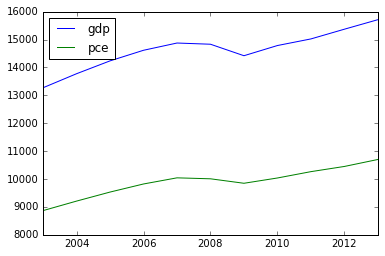

In [7]:
# try this with US GDP
us.plot()

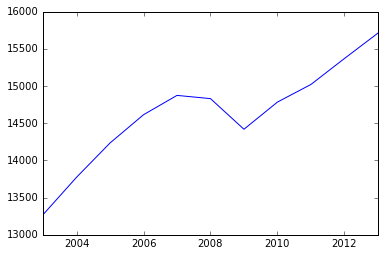

In [8]:
# do GDP alone
us['gdp'].plot()

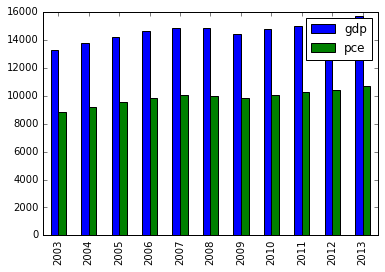

In [9]:
# bar chart 
us.plot(kind='bar')

**Exercise.** Show that we get the output from `us.plot.bar()`.  

In [10]:
us.plot

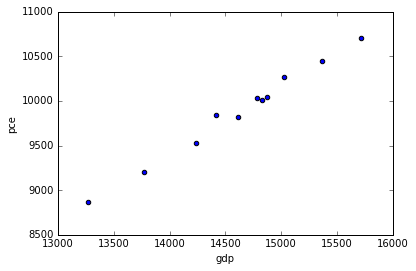

In [11]:
# scatter plot 
# we need to be explicit about the x and y variables: x = 'gdp', y = 'pce'
us.plot.scatter('gdp', 'pce')

**Exercise.** Enter `us.plot(kind='bar')` and `us.plot.bar()` in separate cells.  Show that they produce the same bar chart.  

**Exercise.**  Add each of these arguments, one at a time, to `us.plot()`:  

* `kind='area'`
* `subplots=True`
* `sharey=True`
* `figsize=(3,6)`
* `ylim=(0,16000)`

What do they do?

**Exercise.** Type `us.plot?` in a new cell.  Run the cell (shift-enter or click on the run cell icon).  What options do you see for the `kind=` argument?  Which ones have we tried?  What are the other ones?  

### Fama-French asset returns 

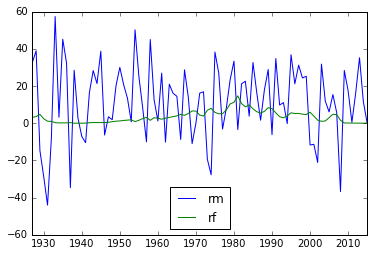

In [12]:
# now try a few things with the Fama-French data
ff.plot()

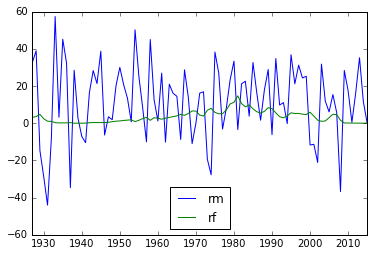

In [13]:
ff.plot()

**Exercise.** What do each of the arguments do in the code below?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11abd41d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11acffe48>], dtype=object)

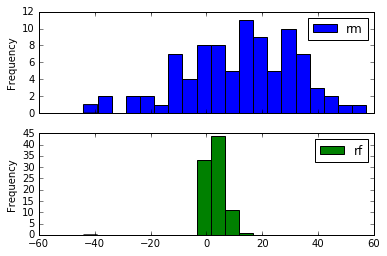

In [14]:
ff.plot(kind='hist', bins=20, subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11addf240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b147080>], dtype=object)

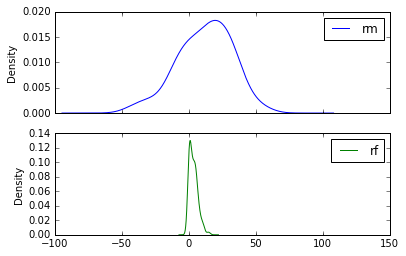

In [15]:
# "smoothed" histogram 
ff.plot(kind='kde', subplots=True, sharex=True)    # smoothed histogram ("kernel density estimate")

**Exercise.**  Let's see if we can dress up the histogram a little.  Try adding, one at a time, the arguments `title='Fama-French returns'`, `grid=True`, and `legend=False`.  What does the documentation say about them?  What do they do?  

**Exercise.**  What do the histograms tell us about the two returns?  How do they differ?  


**Exercise.**  Use the World Bank dataframe `wbdf` to create a bar chart of GDP per capita, the variable `'gdppc'`. *Bonus points:* Create a horizontal bar chart. Which do you prefer?  

## Approach #2:  the `plot(x,y)` function 

Here we plot variable `y` against variable `x`.  This comes closest to what we would do in Excel:  identify a dataset, a plot type, and the `x` and `y` variables, then press play.  

In [16]:
# import pyplot module of Matplotlib 
import matplotlib.pyplot as plt      

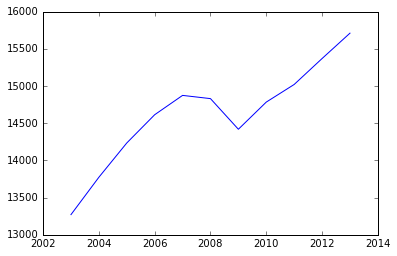

In [17]:
plt.plot(us.index, us['gdp'])

**Exercise.** What is the `x` variable here?  The `y` variable?  

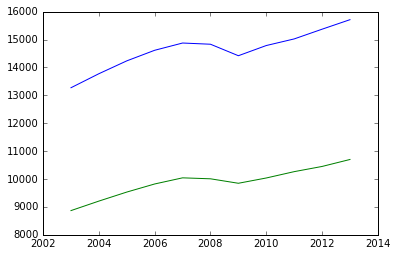

In [18]:
# we can do two lines together
plt.plot(us.index, us['gdp'])
plt.plot(us.index, us['pce'])

<Container object of 11 artists>

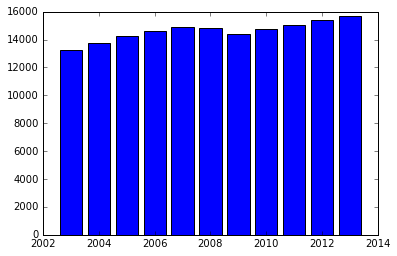

In [19]:
# or a bar chart 
plt.bar(us.index, us['gdp'], align='center')

**Exercise.** Experiment with 
```python
plt.bar(us.index, us['gdp'], 
        align='center', 
        alpha=0.65, 
        color='red', 
        edgecolor='green')
```
Play with the arguments one by one to see what they do.  Or use `plt.bar?` to look them up.  Add comments to remind yourself. *Bonus points:*  Can you make this graph even uglier?  

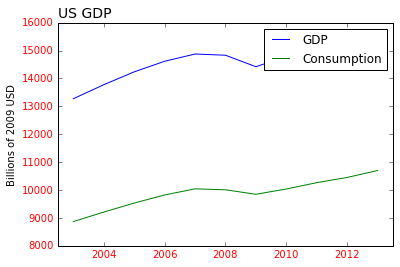

In [20]:
# we can also add things to plots 
plt.plot(us.index, us['gdp']) 
plt.plot(us.index, us['pce']) 

plt.title('US GDP', fontsize=14, loc='left') # add title
plt.ylabel('Billions of 2009 USD')           # y axis label 
plt.xlim(2002.5, 2013.5)                     # shrink x axis limits
plt.tick_params(labelcolor='red')            # change tick labels to red
plt.legend(['GDP', 'Consumption'])           # more descriptive variable names

**Comment.** All of these statements must be in the same cell for this to work.  

**Comment.** This is overkill -- it looks horrible -- but it makes the point that we control everything in the plot.  We recommend you do very little of this until you're more comfortable with the basics.  

**Exercise.** Add a `plt.ylim()` statement to make the `y` axis start at zero, as it did in the bar charts.  *Bonus points:*  Change the color to magenta and the linewidth to 2.  *Hint:*  Use `plt.ylim?` and `plt.plot?` to get the documentation.  

**Exercise.** Create a line plot for the Fama-French dataframe `ff` that includes both returns.  *Bonus points:* Add a title and label the y axis.  

## Approach #3:  Create figure objects and apply methods

This approach is the most foreign to beginners, but now that we’re used to it we like it a lot. The idea is to generate an object – two objects, in fact – and apply methods to them to produce the various elements of a graph: the data, their axes, their labels, and so on.

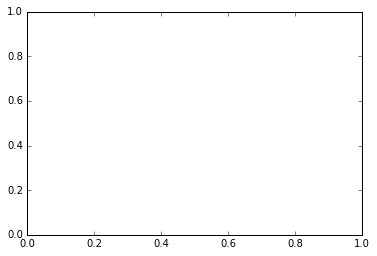

In [21]:
# create fig and ax objects
fig, ax = plt.subplots()

**Exercise.** What do we have here?  What `type` are `fig` and `ax`?  

We say `fig` is a **figure object** and `ax` is an **axis object**.  This means:
    
* `fig` is a blank canvas for creating a figure.
* `ax` is everything in it:  axes, labels, lines or bars, and so on.  

**Exercise.** Use tab completion to see what methods are available for `fig` and `ax`.  What do you see?  Do you feel like screaming?

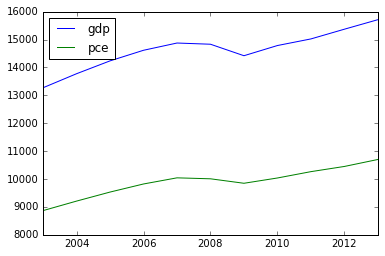

In [22]:
# let's try that again, this time with content  
# create objects 
fig, axe = plt.subplots()

# add things by applying methods to ax 
us.plot(ax=axe) 

**Comment.** Both of these statements must be in the same cell.  

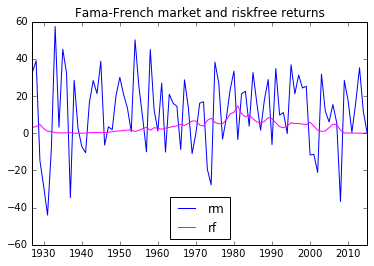

In [23]:
# Fama-French example 
fig, ax = plt.subplots()
ff.plot(ax=ax, 
        kind='line',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns')

**Exercise.**  Let's see if we can teach ourselves the rest:  

* Add the argument `kind='bar'` to convert this into a bar chart.  
* Add the argument `alpha=0.65` to the bar chart.  What does it do?  
* What would you change in the bar chart to make it look better?  Use the help facility to find options that might help.  Which ones appeal to you?  

**Exercise (somewhat challenging).** Use the same approach to reproduce our earlier histograms of the Fama-French series.  

## Quick review of the bidding

Take a deep breath.  We've covered a lot of ground, let's take stock.  

We looked at three ways to use Matplotlib:

* Approach #1:  apply plot method to dataframe
* Approach #2:  use `plot(x,y)` function 
* Approach #3:  create `fig, ax` objects, apply plot methods to them

Same result, different syntax.  This is what each of them looks like applied to US GDP: 

```python
us['gdp'].plot()                   # Approach #1

plt.plot(us.index, us['gdp'])      # Approach #2

fig, ax = plt.subplots()           # Approach #3 
ax.plot(us.index, us['gdp'])       
```

## Bells and whistles 

### Adding things to graphs

We have lots of choices.  Here's an example.

(0, 16000.0)

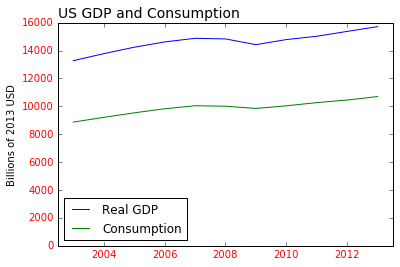

In [28]:
fig, ax = plt.subplots()

us.plot(ax=ax)       
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['Real GDP', 'Consumption'], loc=0)  # more descriptive variable names 
ax.set_xlim(2002.5, 2013.5)                    # expand x axis limits
ax.tick_params(labelcolor='red')               # change tick labels to red
ax.set_ylim(0)

(Your results may differ, but we really enjoyed that.) 

**Exercise.** Use the `set_xlabel()` method to add an x-axis label.  What would you choose?  Or would you prefer to leave it empty?  

**Exercise.** Enter `ax.set_legend?` to access the documentation for the `set_legend` method.  What options appeal to you?  

**Exercise.**  Change the line width to 2 and the line colors to blue and magenta.  *Hint:*  Use `us.plot?` to get the documentation.  

**Exercise (challenging).** Use the `set_ylim()` method to start the `y` axis at zero.  *Hint:*  Use `ax.set_ylim?` to get the documentation.  

**Exercise.** Create a line plot for the Fama-French dataframe `ff` that includes both returns.  *Bonus points:* Add a title with the `set_title` method.  

### Multiple subplots 

Same idea, but we create a multidimensional `ax` and apply methods to each component. Here we redo the plots of US GDP and consumption.  

Object ax has dimension 2


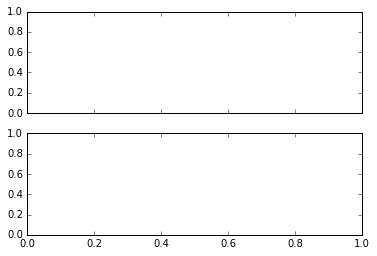

In [29]:
# this creates a 2-dimensional ax 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)   
print('Object ax has dimension', len(ax))

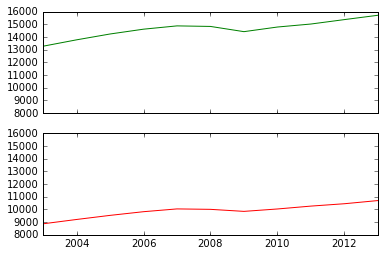

In [31]:
# now add some content 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

us['gdp'].plot(ax=ax[0], color='green')   # first plot
us['pce'].plot(ax=ax[1], color='red')     # second plot

## Examples

We conclude with examples that take the data from the previous chapter and make better graphs with it.  

### Student test scores (PISA) 

The international test scores often used to compare quality of education across countries.  

In [32]:
# data input 
import pandas as pd
url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url, 
                     skiprows=18,     # skip the first 18 rows 
                     skipfooter=7,    # skip the last 7 
                     parse_cols=[0,1,9,13], # select columns 
                     index_col=0,     # set index = first column
                     header=[0,1]     # set variable names 
                     )
pisa = pisa.dropna()                          # drop blank lines 
pisa.columns = ['Math', 'Reading', 'Science'] # simplify variable names 

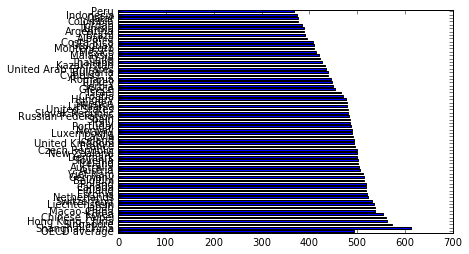

In [33]:
# bar chart of math scores 
fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax)  

**Comment.** Yikes!  That's horrible!  What can we do about it?  

Let's make the figure taller.  The `figsize` argument has the form `(width, height)`.  The default is `(6, 4)`.  We want a tall figure, so we need to increase the height setting.  

In [ ]:
fig.

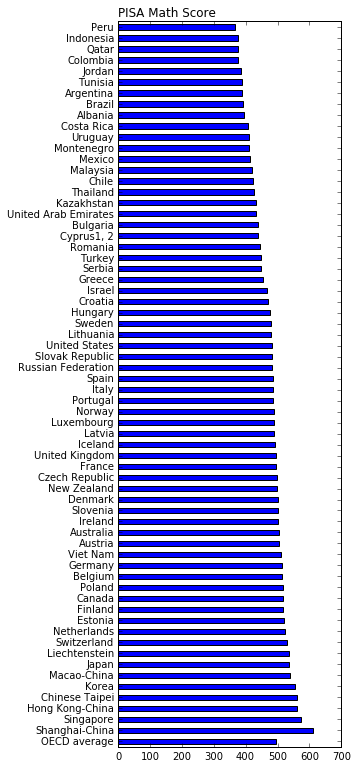

In [35]:
# make the plot taller 
fig, ax = plt.subplots(figsize=(4, 13))  # note figsize 
pisa['Math'].plot(kind='barh', ax=ax)  
ax.set_title('PISA Math Score', loc='left')

**Comment.** What if we wanted to make the US bar red?  This is ridiculously complicated, but we used our Google fu and found [a solution](http://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python).  Remember: The solution to many problems is Google fu + patience.    

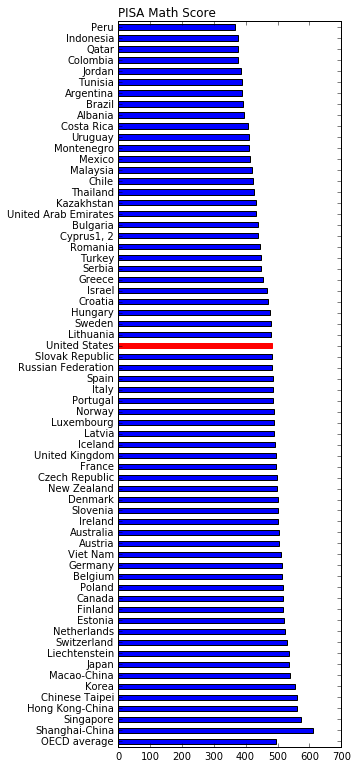

In [52]:
fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax, figsize=(4,13))
ax.set_title('PISA Math Score', loc='left')
ax.get_children()[36].set_color('r')

**Exercise.** Create the same graph for the Reading score.  

### World Bank data

We'll use World Bank data for GDP, GDP per capita, and life expectancy to produce a few graphs and illsutrate some methods we haven't seen yet.   

* Bar charts of GDP and GDP per capita 
* Scatter plot (bubble plot) of life expectancy v GDP per capita 

In [53]:
# load packages (redundancy is ok)
import pandas as pd                   # data management tools
from pandas.io import wb              # World Bank api
import matplotlib.pyplot as plt       # plotting tools

# variable list (GDP, GDP per capita, life expectancy)
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'life'] # rename variables
df['pop']  = df['gdp']/df['gdppc']    # population 
df['gdp'] = df['gdp']/10**12          # convert to trillions
df['gdppc'] = df['gdppc']/10**3       # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]   # reorder countries
df = df.sort_values(by='order', ascending=False)
df

/Users/sglyon/anaconda3/lib/python3.5/site-packages/pandas/io/wb.py:19: FutureWarning: 
The pandas.io.wb module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,gdppc,gdp,life,pop,order
country,,,,,
Mexico,16.140664,1.997247,76.532659,1.237401e+08,6
Brazil,15.222320,3.109302,74.122439,2.042594e+08,5
India,5.131826,6.566166,67.660415,1.279499e+09,4
China,11.805087,16.023988,75.353024,1.357380e+09,3
Japan,35.614310,4.535077,83.331951,1.273386e+08,2
France,37.306283,2.459435,81.968293,6.592550e+07,1
United States,51.281583,16.230494,78.841463,3.164975e+08,0


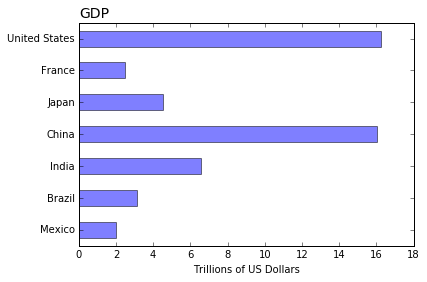

In [54]:
# GDP bar chart
fig, ax = plt.subplots()
df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

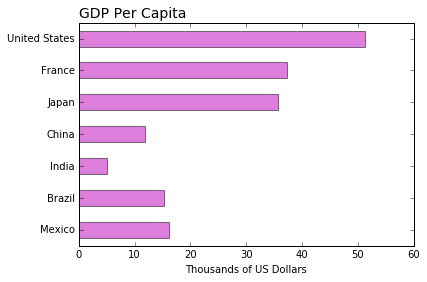

In [62]:
# ditto for GDP per capita (per person)
fig, ax = plt.subplots()
df['gdppc'].plot(ax=ax, kind='barh', color='m', alpha=0.50)  # 'm' == 'magenta'
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

And just because it's fun, here's an example of Tufte-like axes from [Matplotlib examples](http://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html).  If you want to do this yourself, copy the last six line and prepare yourself to sink some time into it.  

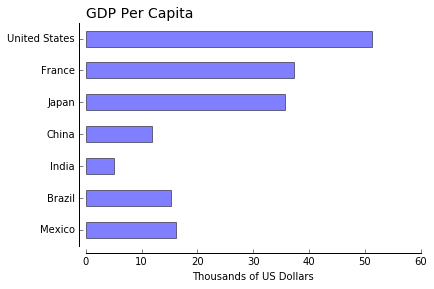

In [65]:
# ditto for GDP per capita (per person)
fig, ax = plt.subplots()
df['gdppc'].plot(ax=ax, kind='barh', color='b', alpha=0.5)
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

# Tufte-like axes
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

**Exercise (challenging).**  Make the ticks point out.  

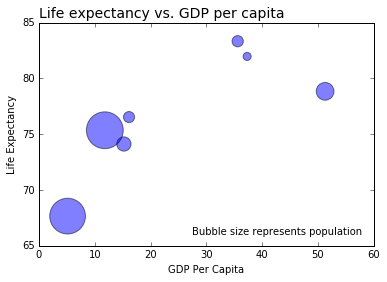

In [97]:
# scatterplot of life expectancy vs gdp per capita
fig, ax = plt.subplots()
ax.scatter(df['gdppc'], df['life'],     # x,y variables
            s=df['pop']/10**6,          # size of bubbles
            alpha=0.5)   
ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

**Exercise.** Make the bubble a little larger.  

## Styles (optional)

Graph settings you might like.  

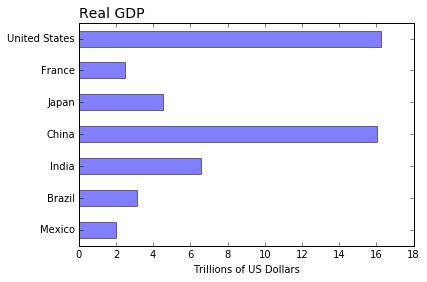

In [98]:
# We'll look at this chart under a variety of styles.
# Let's make a function so we don't have to repeat the
# code to create 
def gdp_bar():
    fig, ax = plt.subplots()
    df['gdp'].plot(ax=ax, kind='barh', alpha=0.5)
    ax.set_title('Real GDP', loc='left', fontsize=14)
    ax.set_xlabel('Trillions of US Dollars')
    ax.set_ylabel('')
    
gdp_bar()

**Exercise.**  Create the same graph with this statement at the top:
```python
plt.style.use('fivethirtyeight')
```
(Once we execute this statement, it stays executed.) 

**Comment.** We can get a list of files from `plt.style.available`.  

In [88]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-dark',
 'ggplot',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'classic',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-talk',
 'seaborn-bright',
 'dark_background',
 'seaborn-muted',
 'bmh',
 'seaborn-white',
 'seaborn-deep',
 'fivethirtyeight',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-colorblind']

**Comment.** Ignore the seaborn styles, that's a package we don't have yet.  

**Exercise.** Try another one by editing the code below.  

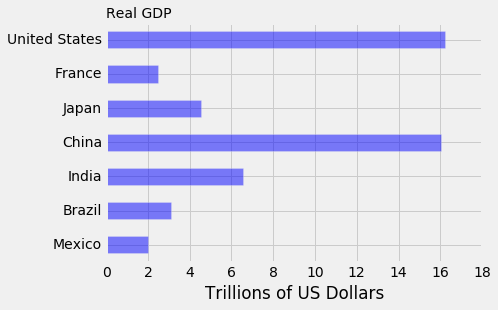

In [99]:
plt.style.use('fivethirtyeight')
gdp_bar()

**Comment.** For aficionados, the always tasteful [xkcd style](http://xkcd.com/1235/).  

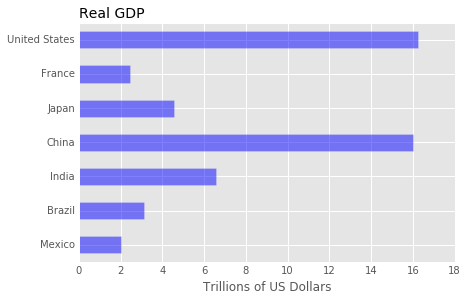

In [100]:
plt.style.use('ggplot')
gdp_bar()

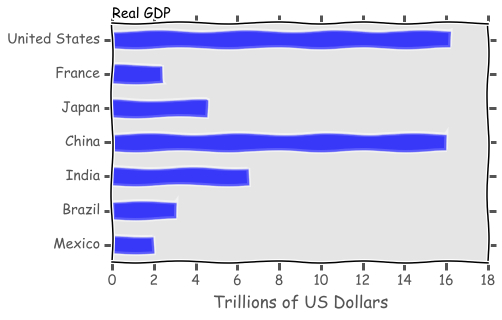

In [101]:
plt.xkcd()
gdp_bar()

**Comment.** We reset the style with these two lines: 

In [95]:
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

## Review

Consider the data from Randal Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/):  

```python
import pandas as pd 
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'], 
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)
```

The dataframe `cals` contains the calories in 100 grams of several different foods.  


**Exercise.** We'll create and modify visualizations of this data:  

* Set `'Food'` as the index of `cals`.  
* Create a bar chart with `cals` using figure and axis objects. 
* Add a title.  
* Change the color of the bars.  What color do you prefer?   
* Add the argument `alpha=0.5`.  What does it do?  
* Change your chart to a horizontal bar chart.  Which do you prefer?   
* *Challenging.*  Eliminate the legend.  
* *Challenging.*  Skim the top of Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). What do you see that you'd like to imitate?  

## Where does that leave us?

* We now have several ways to produce graphs.  
* Next up:  think about what we want to graph and why. The tools serve that higher purpose.  